# 02 Pages with SRI

In [6]:
import re
import datetime
from glob import iglob
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.shell import sqlContext

## Load the data

In [9]:
def loadData(path):
    frames = []
    for file in iglob(path, recursive=True):
        print(file)
        crawl = re.findall(r'/(\d{4}-\d{2})/', file)
        date = datetime.datetime.strptime(crawl[0] + "-1", "%Y-%W-%w")
        frame = sqlContext.read.parquet(file).toPandas()
        frame['date'] = date
        frames.append(frame)
    return pd.concat(frames, ignore_index=True).set_index('date').sort_index()

In [10]:
data = loadData('../data/sri/*/reports/02_pages_with_sri/')
script = loadData('../data/sri/*/reports/02_pages_with_sri_script/')
link = loadData('../data/sri/*/reports/02_pages_with_sri_link/')
top1m = loadData('../data/sri/*/reports/02_pages_with_sri_top1m/')
top1k = loadData('../data/sri/*/reports/02_pages_with_sri_top1k/')

../data/sri/2018-34/reports/02_pages_with_sri/
../data/sri/2016-18/reports/02_pages_with_sri/
../data/sri/2019-35/reports/02_pages_with_sri/
../data/sri/2017-34/reports/02_pages_with_sri/
../data/sri/2018-09/reports/02_pages_with_sri/
../data/sri/2019-09/reports/02_pages_with_sri/
../data/sri/2017-09/reports/02_pages_with_sri/
../data/sri/2018-34/reports/02_pages_with_sri_script/
../data/sri/2016-18/reports/02_pages_with_sri_script/
../data/sri/2017-34/reports/02_pages_with_sri_script/
../data/sri/2018-09/reports/02_pages_with_sri_script/
../data/sri/2019-09/reports/02_pages_with_sri_script/
../data/sri/2017-09/reports/02_pages_with_sri_script/
../data/sri/2018-34/reports/02_pages_with_sri_link/
../data/sri/2016-18/reports/02_pages_with_sri_link/
../data/sri/2017-34/reports/02_pages_with_sri_link/
../data/sri/2018-09/reports/02_pages_with_sri_link/
../data/sri/2019-09/reports/02_pages_with_sri_link/
../data/sri/2017-09/reports/02_pages_with_sri_link/
../data/sri/2018-34/reports/02_page

AnalysisException: 'Unable to infer schema for Parquet. It must be specified manually.;'

In [ ]:
data

## Plot the data

### SRI release

23 June 2016

https://www.w3.org/TR/SRI/

NameError: name 'top1k' is not defined

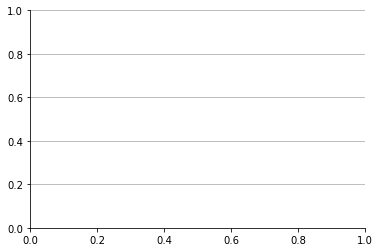

In [4]:
plot, ax = plt.subplots(1, 1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid()

plt.plot(top1k.index, top1k['percentage'], label='any tag (top1k)', marker='o', linestyle='--')
plt.plot(top1m.index, top1m['percentage'], label='any tag (top1m)', marker='o', linestyle='--')

plt.plot(data.index, data['percentage'], label='any tag (commoncrawl)', marker='o')
plt.plot(script.index, script['percentage'], label='script (commoncrawl)', marker='o')
plt.plot(link.index, link['percentage'], label='link (commoncrawl)', marker='o')

plt.text(datetime.date(2016, 6, 23) + datetime.timedelta(days=10), 2.32, "SRI W3C Specification")
plt.axvline(x=datetime.date(2016, 6, 23), color='k', linestyle='--', linewidth=1)

ax.set_yticklabels(['{:,.0%}'.format(x / 100) for x in ax.get_yticks()])

plt.xticks(rotation=45)
plt.xlabel('Time')
plt.xlim(datetime.date(2016, 3, 1), datetime.date(2019, 10, 1))
plt.ylabel('Webpages')
plt.legend(loc='upper left')
plt.savefig('02_pages_with_sri.pdf', bbox_inches = 'tight')

In [5]:
out = open("02_pages_with_sri.tex", 'w')
    
lastCrawl = data.reset_index()[-1:]
out.write("\def\\CCUrlSriN{\\num{" + ("%0.2f" % lastCrawl['number']) + "}}\n")
out.write("\def\\CCUrlSriP{\\num{" + ("%0.2f" % lastCrawl['percentage']) + "}\%}\n")

out.close()
